In [1]:
#All cells combined take around 10 seconds to execute and generate all graphs
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import pandas as pd
from scipy.stats import bernoulli, binom
np.random.seed(1)
# Importing the required packages and setting the random seeds

In [2]:
#Poisson Random Variables X and Y
#Parameter Initialization
lambda_x = 3
lambda_y = 4
no=1000000

In [3]:
X = np.random.poisson( lambda_x, size=(no,) )

In [4]:
Y = np.random.poisson( lambda_y, size=(no,) )

In [5]:
Z = X+Y
#Equivalent to sampling 10,000 draws of Z, since Z is defined as X+Y

In [6]:
Z_x, Z_y = np.unique(Z, return_counts=True)
#Calculating the frequency of the each value of the random variable

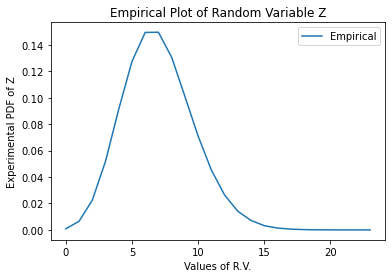

In [7]:
plt.plot( Z_x, Z_y/no, label = "Empirical")
plt.title("Empirical Plot of Random Variable Z")
plt.ylabel("Experimental PDF of Z")
plt.xlabel("Values of R.V.")
plt.legend()
plt.savefig("Empirical_Z.png", dpi=100)
plt.show()

In [8]:
#Reporting values of Z
count=0
print("The value of empirical distribution are as follows-")
for i in Z_y:
    count+=1
    print("for k = "+str(count)+ "->  "+ str(i))

The value of empirical distribution are as follows-
for k = 1->  879
for k = 2->  6491
for k = 3->  22413
for k = 4->  51849
for k = 5->  91221
for k = 6->  127343
for k = 7->  149324
for k = 8->  149479
for k = 9->  130571
for k = 10->  100970
for k = 11->  70947
for k = 12->  45282
for k = 13->  26399
for k = 14->  14113
for k = 15->  7130
for k = 16->  3225
for k = 17->  1402
for k = 18->  604
for k = 19->  230
for k = 20->  83
for k = 21->  33
for k = 22->  9
for k = 23->  1
for k = 24->  2


In [9]:
#Analytical definition of PDF of the poisson function
def poisson_pdf(x, lambd):
    var = np.power(lambd, x)*np.exp(-lambd)/factorial(x)
    return var

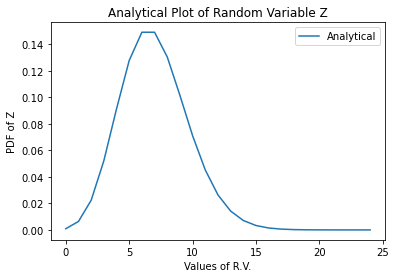

In [10]:
# Plotting the analytical function
def pdf_plot(function, range_x, param):
    x_axis = np.arange(0, range_x)
    y_axis = function(x_axis, param)
    plt.plot(x_axis, y_axis, label = "Analytical" )
    plt.title("Analytical Plot of Random Variable Z")
    plt.ylabel("PDF of Z")
    plt.xlabel("Values of R.V.")
    plt.legend()
    plt.savefig("Analytical_Z.png", dpi=100)
    plt.show()
pdf_plot(poisson_pdf, 25, lambda_x+lambda_y)

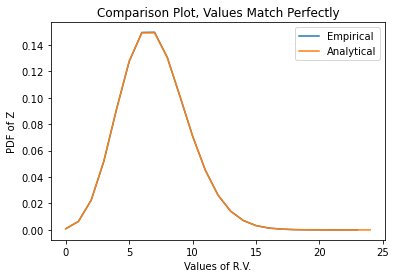

In [11]:
#Comparing the plots
plt.plot( Z_x, Z_y/no, label = "Empirical")
x_axis = np.arange(0, 25)
y_axis = poisson_pdf(x_axis, lambda_x+lambda_y)
plt.plot(x_axis, y_axis, label = "Analytical" )
plt.legend()
plt.ylabel("PDF of Z")
plt.xlabel("Values of R.V.")
plt.title("Comparison Plot, Values Match Perfectly")
plt.savefig("Comparison.png", dpi=100)
plt.show()

In [12]:
m=0
v = np.zeros(Z_y.shape)
for i in range(0, Z_y.shape[0]):
    v[i]=abs(poisson_pdf(i, lambda_x+lambda_y)- Z_y[i]/no)
    print("Absolute Error for k =", i, "is  ", v[i] )
    m+=v[i]
print("\nAverage Error- ")
print(m/Z_y.shape[0])    

Absolute Error for k = 0 is   3.288196555451624e-05
Absolute Error for k = 1 is   0.00010782624111838664
Absolute Error for k = 2 is   7.18918439143526e-05
Absolute Error for k = 3 is   0.00028025236419984556
Absolute Error for k = 4 is   5.1916373497301604e-06
Absolute Error for k = 5 is   0.00037366829228960285
Absolute Error for k = 6 is   0.00032122032566211933
Absolute Error for k = 7 is   0.0004762203256621078
Absolute Error for k = 8 is   0.00019356778495435711
Absolute Error for k = 9 is   0.00043466950059106724
Absolute Error for k = 10 is   3.62686504137566e-05
Absolute Error for k = 11 is   0.00011082904064579902
Absolute Error for k = 12 is   4.915027371004896e-05
Absolute Error for k = 13 is   7.538062184843375e-05
Absolute Error for k = 14 is   3.580968907578204e-05
Absolute Error for k = 15 is   8.56221450979684e-05
Absolute Error for k = 16 is   4.63971884803612e-05
Absolute Error for k = 17 is   7.6011576845572354e-06
Absolute Error for k = 18 is   1.9328831226721936e-

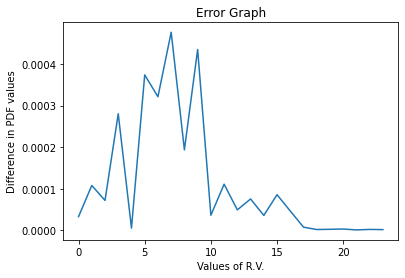

In [13]:
plt.plot(range(0,Z_y.shape[0]), v)
plt.title("Error Graph")
plt.ylabel("Difference in PDF values")
plt.xlabel("Values of R.V.")
plt.savefig("Errors.png", dpi=100)
plt.show()

In [14]:
#Beginning Part 2, Poisson Thinning

In [15]:
p=0.8
#Thinning parameter

In [16]:
no2 = 100000

In [17]:
#Initialising the random variable Y, sampling 100,000 draws
Y = np.random.poisson( lambda_y, size=(no2) )

In [18]:
#Applying the thinning process to obtain the variable Z
Z = binom(Y, p).rvs()

In [19]:
Z

array([4, 2, 7, ..., 3, 2, 1])

In [20]:
#Calculating the frequency of the each value of the random variable
Z_x, Z_y = np.unique(Z, return_counts=True)

In [21]:
#Reporting values of Z
count=0
print("The value of empirical distribution are as follows-")
for i in Z_y:
    count+=1
    print("for k = "+str(count)+ "->  "+ str(i))

The value of empirical distribution are as follows-
for k = 1->  4012
for k = 2->  12996
for k = 3->  20694
for k = 4->  22397
for k = 5->  17771
for k = 6->  11447
for k = 7->  6131
for k = 8->  2828
for k = 9->  1139
for k = 10->  409
for k = 11->  124
for k = 12->  39
for k = 13->  10
for k = 14->  2
for k = 15->  1


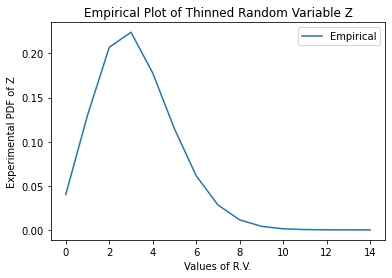

In [22]:
plt.plot( Z_x, Z_y/no2, label = "Empirical")
plt.title("Empirical Plot of Thinned Random Variable Z")
plt.ylabel("Experimental PDF of Z")
plt.xlabel("Values of R.V.")
plt.legend()
plt.savefig("Empirical_Z_Thinned.png", dpi=100)
plt.show()

Theoretical Value, lambda_z = p*lambda_y, from analytical calculations

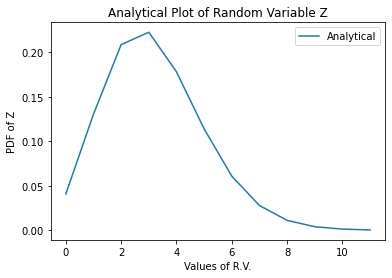

In [23]:
def pdf_plot(function, range_x, param):
    x_axis = np.arange(0, range_x)
    y_axis = function(x_axis, param)
    plt.plot(x_axis, y_axis, label = "Analytical" )
    plt.title("Analytical Plot of Random Variable Z")
    plt.ylabel("PDF of Z")
    plt.xlabel("Values of R.V.")
    plt.legend()
    plt.savefig("Analytical_Z_Thinned.png", dpi=100)
    plt.show()
pdf_plot(poisson_pdf, 12, p*lambda_y)

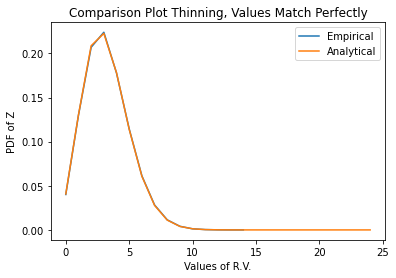

In [24]:
#Comparing the plots
plt.plot( Z_x, Z_y/no2, label = "Empirical")
x_axis = np.arange(0, 25)
y_axis = poisson_pdf(x_axis, lambda_y*p)
plt.plot(x_axis, y_axis, label = "Analytical" )
plt.legend()
plt.ylabel("PDF of Z")
plt.xlabel("Values of R.V.")
plt.title("Comparison Plot Thinning, Values Match Perfectly")
plt.savefig("Comparison_Thinning.png", dpi=100)
plt.show()

In [25]:
m=0
v = np.zeros(Z_y.shape)
for i in range(0, Z_y.shape[0]):
    v[i]=abs(poisson_pdf(i, lambda_y*p)- Z_y[i]/no2)
    print("Absolute Error for k =", i, "is  ", v[i] )
    m+=v[i]
print("\nAverage Error- ")
print(m/Z_y.shape[0])    

Absolute Error for k = 0 is   0.0006422039783662084
Absolute Error for k = 1 is   0.00047905273077189503
Absolute Error for k = 2 is   0.00176248436923504
Absolute Error for k = 3 is   0.0013540166728159553
Absolute Error for k = 4 is   0.0003827866617472364
Absolute Error for k = 5 is   0.0004906165364817611
Absolute Error for k = 6 is   0.000520995486123603
Absolute Error for k = 7 is   0.0004907407936565016
Absolute Error for k = 8 is   0.0002742963174625999
Absolute Error for k = 9 is   0.00013774980176447984
Absolute Error for k = 10 is   2.4720063435366545e-05
Absolute Error for k = 11 is   2.2081436091529716e-05
Absolute Error for k = 12 is   1.8883829577412626e-06
Absolute Error for k = 13 is   4.150551887325227e-06
Absolute Error for k = 14 is   4.479873854325662e-06

Average Error- 
0.0004394842437767712


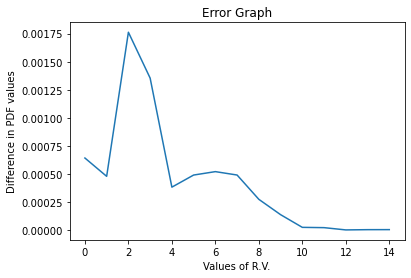

In [26]:
plt.plot(range(0,Z_y.shape[0]), v)
plt.title("Error Graph")
plt.ylabel("Difference in PDF values")
plt.xlabel("Values of R.V.")
plt.savefig("Errors_thinned.png", dpi=100)
plt.show()

In [27]:
#End of Question 2